# 匯入所需要的套件

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import numpy as np

# 取出樣本資料500筆，noise=0.1，random_state=2

In [2]:
X , y = make_circles(n_samples = 500 , noise = 0.1 , random_state = 2)

# 畫出散佈圖

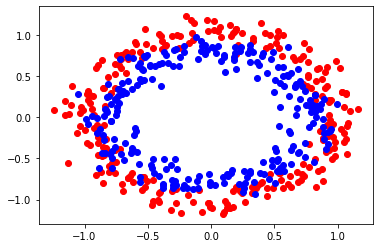

In [3]:
plt.scatter(X[y==0 , 0] , X[y==0 , 1] , color = 'red')
plt.scatter(X[y==1 , 0] , X[y==1 , 1] , color = 'blue')

# 切割出訓練集與測試集 train: test = 7:3

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 42)

# 由於資料完整，故不做預處理，用Perceptron訓練模型，random_state 參數是為了確保每次運行的結果都一致，score 方法計算模型在測試集上的正確率，可得出正確率Accuracy為0.49

In [5]:
clf = Perceptron(random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print("Perceptron's Accuracy {:.2f}" .format(accuracy))

Perceptron's Accuracy 0.49


# 使用 np.meshgrid 函數生成一個二維網格，然後將網格上的點作為輸入，使用模型的 predict 方法預測它們的標籤，最後繪製Perceptron決策區域圖和散點圖。

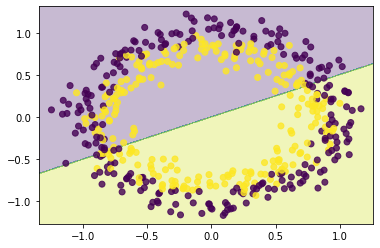

In [6]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

# 用LogisticRegression訓練模型，random_state 參數是為了確保每次運行的結果都一致，score 方法計算模型在測試集上的正確率，可得出正確率Accuracy為0.45

In [7]:
log = LogisticRegression(random_state=42)
log.fit(X_train, y_train)
accuracy = log.score(X_test, y_test)

print("LogisticRegression's Accuracy {:.2f}" .format(accuracy))

LogisticRegression's Accuracy 0.45


# 使用 np.meshgrid 函數生成一個二維網格，然後將網格上的點作為輸入，使用模型的 predict 方法預測它們的標籤，最後繪製決策區域圖和散點圖。

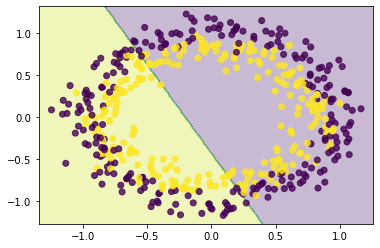

In [8]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()

# 首先使用 StandardScaler 進行標準化

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 接著使用MLPClassifier類別來創建神經網絡模型

In [10]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, alpha=0.1, solver='lbfgs', random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

# 開始進行訓練模型，epochs訓練次數選用1000次，多方嘗試後決定選用的次數

In [26]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2 , validation_data = (X_test , y_pred))

Epoch 1/1000
11/11 [==============================] - 2s 39ms/step - loss: 0.8067 - accuracy: 0.5029 - val_loss: 0.9425 - val_accuracy: 0.3867
Epoch 2/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.8001 - accuracy: 0.5029 - val_loss: 0.9320 - val_accuracy: 0.3867
Epoch 3/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.7942 - accuracy: 0.5029 - val_loss: 0.9222 - val_accuracy: 0.3867
Epoch 4/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.7889 - accuracy: 0.5000 - val_loss: 0.9122 - val_accuracy: 0.3867
Epoch 5/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.7832 - accuracy: 0.4943 - val_loss: 0.9031 - val_accuracy: 0.3867
Epoch 6/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.7781 - accuracy: 0.4943 - val_loss: 0.8943 - val_accuracy: 0.3867
Epoch 7/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.7731 - accuracy: 0.4943 - val_loss: 0.8857 - val_accuracy: 0.3867

Epoch 58/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6963 - accuracy: 0.5086 - val_loss: 0.7299 - val_accuracy: 0.3867
Epoch 59/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6960 - accuracy: 0.5086 - val_loss: 0.7292 - val_accuracy: 0.3933
Epoch 60/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6958 - accuracy: 0.5086 - val_loss: 0.7283 - val_accuracy: 0.3867
Epoch 61/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6955 - accuracy: 0.5114 - val_loss: 0.7276 - val_accuracy: 0.3867
Epoch 62/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6952 - accuracy: 0.5114 - val_loss: 0.7271 - val_accuracy: 0.3867
Epoch 63/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6951 - accuracy: 0.5114 - val_loss: 0.7266 - val_accuracy: 0.3867
Epoch 64/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6948 - accuracy: 0.5086 - val_loss: 0.7260 - val_accuracy:

Epoch 115/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6891 - accuracy: 0.5314 - val_loss: 0.7084 - val_accuracy: 0.4267
Epoch 116/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6890 - accuracy: 0.5343 - val_loss: 0.7082 - val_accuracy: 0.4267
Epoch 117/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6889 - accuracy: 0.5286 - val_loss: 0.7082 - val_accuracy: 0.4200
Epoch 118/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6888 - accuracy: 0.5314 - val_loss: 0.7081 - val_accuracy: 0.4200
Epoch 119/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6888 - accuracy: 0.5343 - val_loss: 0.7079 - val_accuracy: 0.4200
Epoch 120/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.5343 - val_loss: 0.7077 - val_accuracy: 0.4200
Epoch 121/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6887 - accuracy: 0.5343 - val_loss: 0.7072 - val_ac

11/11 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.5343 - val_loss: 0.6993 - val_accuracy: 0.4533
Epoch 172/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.5343 - val_loss: 0.6989 - val_accuracy: 0.4533
Epoch 173/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.5371 - val_loss: 0.6991 - val_accuracy: 0.4533
Epoch 174/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.5371 - val_loss: 0.6991 - val_accuracy: 0.4533
Epoch 175/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6854 - accuracy: 0.5371 - val_loss: 0.6988 - val_accuracy: 0.4533
Epoch 176/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.5371 - val_loss: 0.6988 - val_accuracy: 0.4533
Epoch 177/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6853 - accuracy: 0.5371 - val_loss: 0.6986 - val_accuracy: 0.4600
E

Epoch 228/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.5457 - val_loss: 0.6928 - val_accuracy: 0.4800
Epoch 229/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 0.5457 - val_loss: 0.6929 - val_accuracy: 0.4867
Epoch 230/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.5457 - val_loss: 0.6928 - val_accuracy: 0.4867
Epoch 231/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.5457 - val_loss: 0.6925 - val_accuracy: 0.4800
Epoch 232/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.5457 - val_loss: 0.6924 - val_accuracy: 0.4800
Epoch 233/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6816 - accuracy: 0.5457 - val_loss: 0.6926 - val_accuracy: 0.4867
Epoch 234/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6815 - accuracy: 0.5457 - val_loss: 0.6921 - val_ac

11/11 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.5914 - val_loss: 0.6884 - val_accuracy: 0.5600
Epoch 285/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6778 - accuracy: 0.5914 - val_loss: 0.6886 - val_accuracy: 0.5533
Epoch 286/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6777 - accuracy: 0.5914 - val_loss: 0.6884 - val_accuracy: 0.5600
Epoch 287/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.5914 - val_loss: 0.6883 - val_accuracy: 0.5533
Epoch 288/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6776 - accuracy: 0.5943 - val_loss: 0.6883 - val_accuracy: 0.5533
Epoch 289/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.5943 - val_loss: 0.6881 - val_accuracy: 0.5533
Epoch 290/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6774 - accuracy: 0.5943 - val_loss: 0.6884 - val_accuracy: 0.5600


11/11 [==============================] - 0s 10ms/step - loss: 0.6736 - accuracy: 0.6057 - val_loss: 0.6854 - val_accuracy: 0.6067
Epoch 341/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.5971 - val_loss: 0.6856 - val_accuracy: 0.6000
Epoch 342/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6735 - accuracy: 0.5971 - val_loss: 0.6854 - val_accuracy: 0.5933
Epoch 343/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6733 - accuracy: 0.6029 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 344/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6733 - accuracy: 0.6029 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 345/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.5971 - val_loss: 0.6853 - val_accuracy: 0.6000
Epoch 346/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6029 - val_loss: 0.6852 - val_accuracy: 0.6000


Epoch 397/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.6000 - val_loss: 0.6841 - val_accuracy: 0.5800
Epoch 398/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6690 - accuracy: 0.5943 - val_loss: 0.6842 - val_accuracy: 0.5733
Epoch 399/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6689 - accuracy: 0.5943 - val_loss: 0.6840 - val_accuracy: 0.5733
Epoch 400/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6688 - accuracy: 0.5943 - val_loss: 0.6839 - val_accuracy: 0.5733
Epoch 401/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6688 - accuracy: 0.5943 - val_loss: 0.6836 - val_accuracy: 0.5800
Epoch 402/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6686 - accuracy: 0.5943 - val_loss: 0.6837 - val_accuracy: 0.5800
Epoch 403/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6686 - accuracy: 0.5943 - val_loss: 0.6835 - val_accu

11/11 [==============================] - 0s 10ms/step - loss: 0.6640 - accuracy: 0.5914 - val_loss: 0.6822 - val_accuracy: 0.5533
Epoch 454/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.5914 - val_loss: 0.6817 - val_accuracy: 0.5533
Epoch 455/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6637 - accuracy: 0.5914 - val_loss: 0.6820 - val_accuracy: 0.5533
Epoch 456/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6636 - accuracy: 0.5914 - val_loss: 0.6819 - val_accuracy: 0.5533
Epoch 457/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6635 - accuracy: 0.5971 - val_loss: 0.6816 - val_accuracy: 0.5533
Epoch 458/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6634 - accuracy: 0.5971 - val_loss: 0.6816 - val_accuracy: 0.5467
Epoch 459/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6632 - accuracy: 0.6000 - val_loss: 0.6814 - val_accuracy: 0.5467
E

Epoch 510/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.6000 - val_loss: 0.6784 - val_accuracy: 0.5667
Epoch 511/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.6000 - val_loss: 0.6785 - val_accuracy: 0.5667
Epoch 512/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6567 - accuracy: 0.5971 - val_loss: 0.6787 - val_accuracy: 0.5733
Epoch 513/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6566 - accuracy: 0.6029 - val_loss: 0.6781 - val_accuracy: 0.5800
Epoch 514/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6563 - accuracy: 0.6000 - val_loss: 0.6781 - val_accuracy: 0.5667
Epoch 515/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6562 - accuracy: 0.6000 - val_loss: 0.6782 - val_accuracy: 0.5667
Epoch 516/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6560 - accuracy: 0.5971 - val_loss: 0.6782 - val_accur

11/11 [==============================] - 0s 10ms/step - loss: 0.6477 - accuracy: 0.6400 - val_loss: 0.6717 - val_accuracy: 0.6067
Epoch 567/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.6477 - accuracy: 0.6457 - val_loss: 0.6715 - val_accuracy: 0.6000
Epoch 568/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6474 - accuracy: 0.6486 - val_loss: 0.6716 - val_accuracy: 0.5933
Epoch 569/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6472 - accuracy: 0.6486 - val_loss: 0.6711 - val_accuracy: 0.6133
Epoch 570/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6470 - accuracy: 0.6457 - val_loss: 0.6711 - val_accuracy: 0.6067
Epoch 571/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6468 - accuracy: 0.6486 - val_loss: 0.6710 - val_accuracy: 0.6067
Epoch 572/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6466 - accuracy: 0.6543 - val_loss: 0.6708 - val_accuracy: 0.6133
Ep

Epoch 623/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6367 - accuracy: 0.7057 - val_loss: 0.6609 - val_accuracy: 0.6400
Epoch 624/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6365 - accuracy: 0.7057 - val_loss: 0.6607 - val_accuracy: 0.6467
Epoch 625/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6362 - accuracy: 0.7029 - val_loss: 0.6601 - val_accuracy: 0.6467
Epoch 626/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6361 - accuracy: 0.7086 - val_loss: 0.6596 - val_accuracy: 0.6467
Epoch 627/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6358 - accuracy: 0.7029 - val_loss: 0.6594 - val_accuracy: 0.6467
Epoch 628/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6357 - accuracy: 0.7086 - val_loss: 0.6597 - val_accuracy: 0.6467
Epoch 629/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6354 - accuracy: 0.7143 - val_loss: 0.6595 - val_accu

11/11 [==============================] - 0s 10ms/step - loss: 0.6249 - accuracy: 0.7543 - val_loss: 0.6457 - val_accuracy: 0.7067
Epoch 680/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6248 - accuracy: 0.7600 - val_loss: 0.6461 - val_accuracy: 0.6933
Epoch 681/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6246 - accuracy: 0.7600 - val_loss: 0.6462 - val_accuracy: 0.6867
Epoch 682/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6243 - accuracy: 0.7600 - val_loss: 0.6452 - val_accuracy: 0.6933
Epoch 683/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6241 - accuracy: 0.7629 - val_loss: 0.6452 - val_accuracy: 0.7000
Epoch 684/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6239 - accuracy: 0.7629 - val_loss: 0.6451 - val_accuracy: 0.7000
Epoch 685/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6237 - accuracy: 0.7600 - val_loss: 0.6444 - val_accuracy: 0.7000
Ep

11/11 [==============================] - 0s 9ms/step - loss: 0.6132 - accuracy: 0.7714 - val_loss: 0.6303 - val_accuracy: 0.7267
Epoch 736/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6130 - accuracy: 0.7743 - val_loss: 0.6299 - val_accuracy: 0.7333
Epoch 737/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6128 - accuracy: 0.7771 - val_loss: 0.6291 - val_accuracy: 0.7333
Epoch 738/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6126 - accuracy: 0.7743 - val_loss: 0.6292 - val_accuracy: 0.7333
Epoch 739/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.7686 - val_loss: 0.6290 - val_accuracy: 0.7333
Epoch 740/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6122 - accuracy: 0.7714 - val_loss: 0.6288 - val_accuracy: 0.7333
Epoch 741/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6120 - accuracy: 0.7686 - val_loss: 0.6286 - val_accuracy: 0.7333
E

Epoch 792/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6017 - accuracy: 0.7914 - val_loss: 0.6140 - val_accuracy: 0.7333
Epoch 793/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6016 - accuracy: 0.7914 - val_loss: 0.6141 - val_accuracy: 0.7333
Epoch 794/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6014 - accuracy: 0.7857 - val_loss: 0.6137 - val_accuracy: 0.7400
Epoch 795/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6011 - accuracy: 0.7914 - val_loss: 0.6130 - val_accuracy: 0.7400
Epoch 796/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6011 - accuracy: 0.7857 - val_loss: 0.6131 - val_accuracy: 0.7333
Epoch 797/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.6007 - accuracy: 0.7886 - val_loss: 0.6124 - val_accuracy: 0.7333
Epoch 798/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.6005 - accuracy: 0.7886 - val_loss: 0.6124 - val_accu

11/11 [==============================] - 0s 9ms/step - loss: 0.5910 - accuracy: 0.7943 - val_loss: 0.5992 - val_accuracy: 0.7733
Epoch 849/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5908 - accuracy: 0.7943 - val_loss: 0.5984 - val_accuracy: 0.7733
Epoch 850/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5906 - accuracy: 0.7886 - val_loss: 0.5985 - val_accuracy: 0.7733
Epoch 851/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5905 - accuracy: 0.7943 - val_loss: 0.5986 - val_accuracy: 0.7733
Epoch 852/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5902 - accuracy: 0.7943 - val_loss: 0.5982 - val_accuracy: 0.7800
Epoch 853/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5901 - accuracy: 0.7943 - val_loss: 0.5976 - val_accuracy: 0.7800
Epoch 854/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5899 - accuracy: 0.7943 - val_loss: 0.5980 - val_accuracy: 0.7733
E

11/11 [==============================] - 0s 11ms/step - loss: 0.5810 - accuracy: 0.7914 - val_loss: 0.5852 - val_accuracy: 0.7933
Epoch 905/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5808 - accuracy: 0.7886 - val_loss: 0.5854 - val_accuracy: 0.7933
Epoch 906/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5806 - accuracy: 0.7914 - val_loss: 0.5849 - val_accuracy: 0.7933
Epoch 907/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5805 - accuracy: 0.7886 - val_loss: 0.5850 - val_accuracy: 0.7933
Epoch 908/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5804 - accuracy: 0.7857 - val_loss: 0.5849 - val_accuracy: 0.7933
Epoch 909/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5802 - accuracy: 0.7886 - val_loss: 0.5846 - val_accuracy: 0.7867
Epoch 910/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.5799 - accuracy: 0.7914 - val_loss: 0.5841 - val_accuracy: 0.7867


11/11 [==============================] - 0s 10ms/step - loss: 0.5718 - accuracy: 0.7829 - val_loss: 0.5719 - val_accuracy: 0.8000
Epoch 961/1000
11/11 [==============================] - 0s 11ms/step - loss: 0.5716 - accuracy: 0.7829 - val_loss: 0.5721 - val_accuracy: 0.8000
Epoch 962/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5714 - accuracy: 0.7886 - val_loss: 0.5720 - val_accuracy: 0.8000
Epoch 963/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5713 - accuracy: 0.7857 - val_loss: 0.5726 - val_accuracy: 0.8000
Epoch 964/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5711 - accuracy: 0.7829 - val_loss: 0.5720 - val_accuracy: 0.8000
Epoch 965/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5710 - accuracy: 0.7829 - val_loss: 0.5714 - val_accuracy: 0.8000
Epoch 966/1000
11/11 [==============================] - 0s 10ms/step - loss: 0.5708 - accuracy: 0.7829 - val_loss: 0.5715 - val_accuracy: 0.8000


# 在進行訓練後，得出正確率Accuracy

In [29]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Neural Networks Accuracy {:.2f}" .format(accuracy))

5/5 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.8133
Neural Networks Accuracy 0.81


# 使用 np.meshgrid 函數生成一個二維網格，然後將網格上的點作為輸入，使用模型的 predict 方法預測它們的標籤，最後繪製決策區域圖和散點圖。

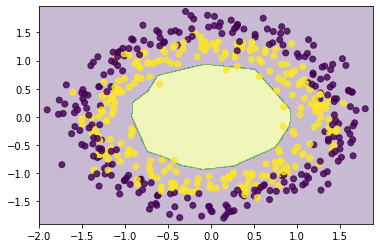

In [35]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.show()